# Data Preparation 

In [2]:
# Importing libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
df = pd.read_csv("data/preprocessed/main.csv")
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Store_Type,Store_Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,A,151315
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,A,151315
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,A,151315
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,A,151315
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,A,151315


In [4]:
# # Remove all MarkDown columns (Excluded from the analysis)
markdown_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
df = df.drop(columns=markdown_columns)
print(df.head())

   Store        Date  Temperature  Fuel_Price         CPI  Unemployment  \
0      1  2010-02-05        42.31       2.572  211.096358         8.106   
1      1  2010-02-05        42.31       2.572  211.096358         8.106   
2      1  2010-02-05        42.31       2.572  211.096358         8.106   
3      1  2010-02-05        42.31       2.572  211.096358         8.106   
4      1  2010-02-05        42.31       2.572  211.096358         8.106   

   IsHoliday  Dept  Weekly_Sales Store_Type  Store_Size  
0      False     1      24924.50          A      151315  
1      False     2      50605.27          A      151315  
2      False     3      13740.12          A      151315  
3      False     4      39954.04          A      151315  
4      False     5      32229.38          A      151315  


# Feature Engineering

### Transform Temporal Data
- Create Date-Based Features

In [5]:
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Day'] = pd.to_datetime(df['Date']).dt.day
df['Week'] = pd.to_datetime(df['Date']).dt.isocalendar().week
df = df.drop(columns=['Date'])  # Drop the original date column
df.head()

,Store,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Store_Type,Store_Size,Year,Month,Day,Week
0,1,42.31,2.572,211.096358,8.106,False,1,24924.50,A,151315,2010,2,5,5
1,1,42.31,2.572,211.096358,8.106,False,2,50605.27,A,151315,2010,2,5,5
2,1,42.31,2.572,211.096358,8.106,False,3,13740.12,A,151315,2010,2,5,5
3,1,42.31,2.572,211.096358,8.106,False,4,39954.04,A,151315,2010,2,5,5
4,1,42.31,2.572,211.096358,8.106,False,5,32229.38,A,151315,2010,2,5,5


### Encode Categorical Variables
Encoding categorical variables using One-Hot Encoding

In [63]:
df = pd.get_dummies(df, columns=['Store_Type'])
df.head()

,Store,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Store_Size,Year,Month,Day,Week,Store_Type_A,Store_Type_B,Store_Type_C
0,1,42.31,2.572,211.096358,8.106,False,1,24924.50,151315,2010,2,5,5,True,False,False
1,1,42.31,2.572,211.096358,8.106,False,2,50605.27,151315,2010,2,5,5,True,False,False
2,1,42.31,2.572,211.096358,8.106,False,3,13740.12,151315,2010,2,5,5,True,False,False
3,1,42.31,2.572,211.096358,8.106,False,4,39954.04,151315,2010,2,5,5,True,False,False
4,1,42.31,2.572,211.096358,8.106,False,5,32229.38,151315,2010,2,5,5,True,False,False


### Standardize/Scale Features
Standardize numerical features like Temperature, Fuel_Price, CPI, and Unemployment to improve model performance

In [64]:
scaler = StandardScaler()

# Define columns to scale
columns_to_scale = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Store_Size']

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

df.head()

,Store,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Store_Size,Year,Month,Day,Week,Store_Type_A,Store_Type_B,Store_Type_C
0,1,-0.963831,-1.72052,1.018422,0.078331,False,1,24924.50,0.238802,2010,2,5,5,True,False,False
1,1,-0.963831,-1.72052,1.018422,0.078331,False,2,50605.27,0.238802,2010,2,5,5,True,False,False
2,1,-0.963831,-1.72052,1.018422,0.078331,False,3,13740.12,0.238802,2010,2,5,5,True,False,False
3,1,-0.963831,-1.72052,1.018422,0.078331,False,4,39954.04,0.238802,2010,2,5,5,True,False,False
4,1,-0.963831,-1.72052,1.018422,0.078331,False,5,32229.38,0.238802,2010,2,5,5,True,False,False


### Correlation plot

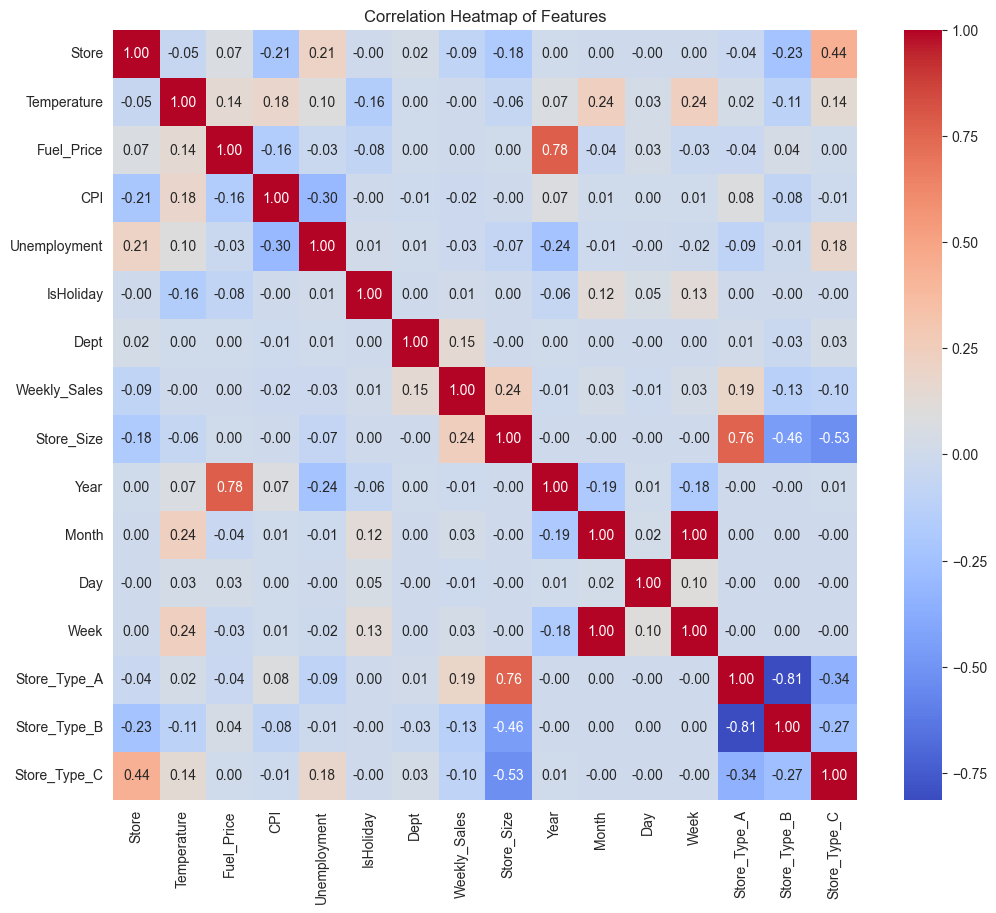

In [65]:
# Plot the correlation heatmap
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True, 
    fmt=".2f",
    cmap="coolwarm",
    cbar=True, 
)
plt.title("Correlation Heatmap of Features")
plt.show()

In [69]:
# Save the ML ready dataset
df.to_csv('./data/preprocessed/main_ML_ready.csv', index=False, header=True)